In [1]:
import pandas as pd
df =pd.read_csv("car_prices.csv")
df

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634
...,...,...,...
295,A296,17183,29327
296,A297,165371,2211
297,A298,148946,9764
298,A299,121336,7099


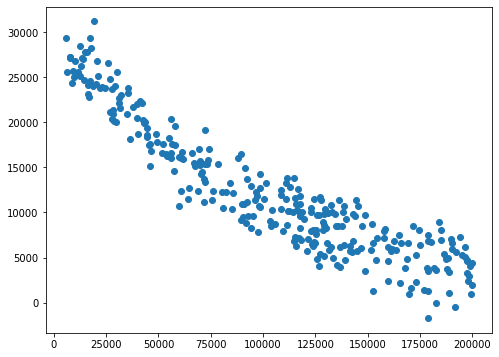

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df.mileage,df.selling_price)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df['selling_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [14]:
X.shape

(300, 1)

In [15]:
X_test.shape

(60, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

poly = PolynomialFeatures(degree = 2)
poly.fit_transform(np.array([[1],[2],[3],[4]]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [20]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [24]:
X_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

In [27]:
model = LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [31]:
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test,Y_pred)
r2 = r2_score(y_test,Y_pred)
mse,r2


(3942449.042820213, 0.916145076991595)

In [32]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(3942449.042820213, 0.916145076991595)

In [33]:
x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

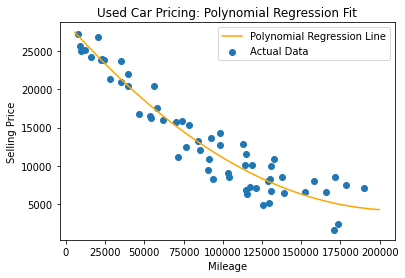

In [34]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()